In [49]:
# Import necessary libraries
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [50]:
# Download the dataset
csv_path = Path("stroke.csv")
stroke_data = pd.read_csv(csv_path)

#print(stroke_data.info())
#print(stroke_data.describe())
#print(stroke_data.head())


In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


def preprocess_data(stroke):
    # Remove the 'id' column since it is not useful for the model
    stroke = stroke.drop(columns=['id'])

    # Fill missing values in the 'bmi' column with the median value
    median = stroke["bmi"].median() 
    stroke["bmi"].fillna(median, inplace=True)

    categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    
    # One-hot encode categorical columns
    cat_encoder = OneHotEncoder(sparse_output=False, drop='first') 
    stroke_cat = cat_encoder.fit_transform(stroke[categorical_columns])
    
    # Create a DataFrame with the one-hot encoded columns
    cat_columns_encoded = cat_encoder.get_feature_names_out(categorical_columns)
    stroke_cat_df = pd.DataFrame(stroke_cat, columns=cat_columns_encoded)
    
    # Drop original categorical columns and concatenate the one-hot encoded columns
    stroke = stroke.drop(columns=categorical_columns)
    stroke = pd.concat([stroke, stroke_cat_df], axis=1)

    # Transform avg_glucose_level and bmi columns to log scale
    stroke['avg_glucose_level'] = np.log(stroke['avg_glucose_level'] + 1)
    

    # Sclaing the numerical columns
    numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
    min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
    stroke[numerical_columns] = min_max_scaler.fit_transform(stroke[numerical_columns])

    return stroke


In [52]:
def plot_data(stroke_data_train):
    stroke_data = stroke_data_train.copy()
    # Plot histogram to get an overview of the data
    stroke_data.hist(bins=50, figsize=(12, 8))
    plt.show()

    stroke_data.plot(kind="scatter", x="bmi", y="age", grid=True, alpha=0.2)
    plt.show()

    corr_matrix = stroke_data.corr()
    print(corr_matrix["stroke"].sort_values(ascending=False))
    

/var/folders/_1/wgxb4j0x2nx9k_cz26sjcggc0000gn/T/ipykernel_79638/4034036549.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke["bmi"].fillna(median, inplace=True)


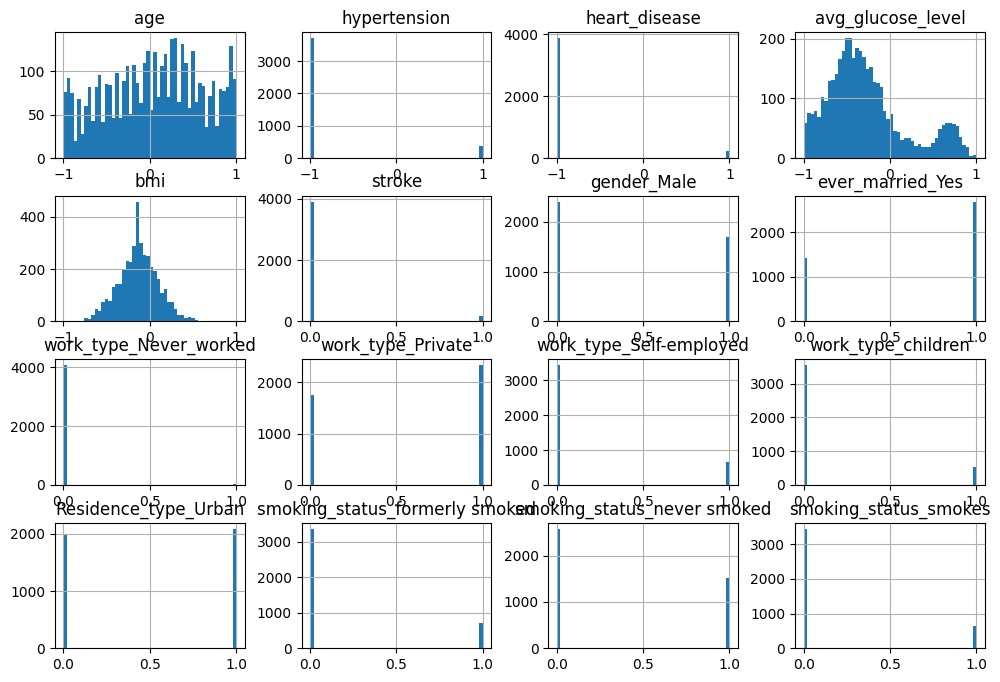

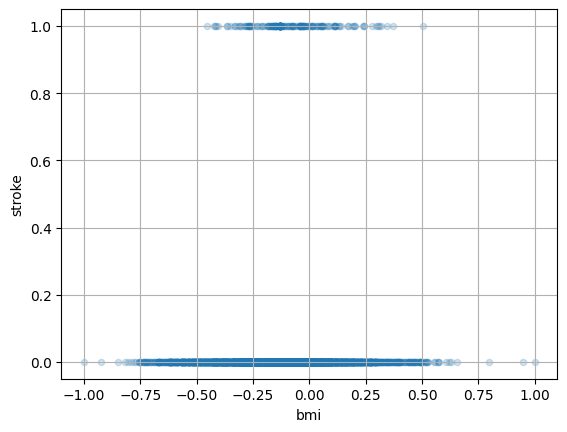

stroke                            1.000000
age                               0.237170
heart_disease                     0.131467
hypertension                      0.118129
avg_glucose_level                 0.113170
bmi                               0.049531
work_type_children                0.027827
smoking_status_smokes             0.009896
gender_Male                       0.007766
Residence_type_Urban              0.001778
work_type_Self-employed          -0.002017
smoking_status_formerly smoked   -0.003341
ever_married_Yes                 -0.008457
smoking_status_never smoked      -0.015900
work_type_Never_worked           -0.016114
work_type_Private                -0.019368
Name: stroke, dtype: float64


In [53]:
# Split data into training and test sets
stroke_data_train, stroke_data_test = train_test_split(stroke_data, test_size=0.2, random_state=42)

# Precprocess data
stroke_data_train = preprocess_data(stroke_data_train)
#print(stroke_data_train.head())

# Plot data
plot_data(stroke_data_train)

X_train, y_train = stroke_data.drop(columns=['stroke']), stroke_data['stroke'].copy()


In [54]:
# define a utility function to print out the prediction performance
def evaluate_result(y_test, y_pred, clf):
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.4f}')
    print(f'AUC-ROC: {roc_auc_score(y_test, clf.predict_proba(X_test_processed)[:, 1]):.4f}')